In [11]:
# Cellule 1
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Supprime les logs TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [12]:
# Cellule 2
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

print("Sous-dossiers de train :", os.listdir(train_dir))
print("Sous-dossiers de test :", os.listdir(test_dir))


Sous-dossiers de train : ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Sous-dossiers de test : ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [13]:
# Cellule 3
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% pour validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
# Cellule 4
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-10 19:56:27.138315: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Cellule 5
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:

# Cellule 6
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 175s 474ms/step - accuracy: 0.2063 - loss: 2.4025 - val_accuracy: 0.1993 - val_loss: 1.9973
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 74s 205ms/step - accuracy: 0.2377 - loss: 1.8443 - val_accuracy: 0.2724 - val_loss: 1.7726
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 82s 204ms/step - accuracy: 0.2407 - loss: 1.8243 - val_accuracy: 0.2778 - val_loss: 1.7585
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 73s 202ms/step - accuracy: 0.2576 - loss: 1.7987 - val_accuracy: 0.2820 - val_loss: 1.7467
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 73s 203ms/step - accuracy: 0.2714 - loss: 1.7772 - val_accuracy: 0.2975 - val_loss: 1.7326
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 73s 204ms/step - accuracy: 0.2753 - loss: 1.7751 - val_accuracy: 0.2907 - val_loss: 1.7176
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 75s 208ms/step - accuracy: 0.2919 - loss: 1.7461 - val_accuracy: 0.3168 - val_loss: 1.7056
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 75s 209ms/step - accuracy: 0.2900 - loss: 

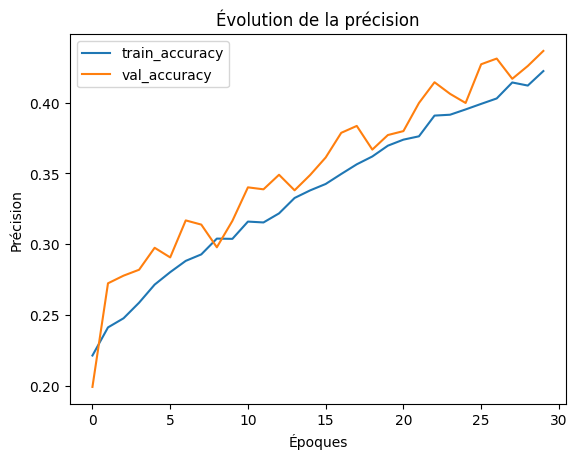

In [21]:
# Cellule 7
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Évolution de la précision")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 387ms/step - accuracy: 0.4937 - loss: 1.3151
Test Accuracy: 48.98%


In [37]:
# Cellule 9
model.save("emotion_detector_model.h5")
print("✅ Modèle sauvegardé sous 'emotion_detector_model.h5'")
from IPython.display import FileLink

# créer un lien de téléchargement
FileLink('emotion_detector_model.h5')


✅ Modèle sauvegardé sous 'emotion_detector_model.h5'


/kaggle/working/emotion_detector_model.h5

In [35]:
# Cellule 10
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/kaggle/input/fer2013/test/surprise/PrivateTest_10712253.jpg"  # Exemple
img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[np.argmax(prediction)]
print("Emotion prédite :", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Emotion prédite : happy
